# Image Clustering using ImageBind LLM Embeddings

This notebook demonstrates clustering of images using ImageBind embeddings. ImageBind is a model that can create joint embeddings across multiple modalities including images, text, audio, and more.

## Overview
- Uses ImageBind to generate embeddings for images
- Applies clustering algorithms on image embeddings
- Evaluates clustering quality
- Visualizes results


In [1]:
# Install required packages (uncomment if needed)
!pip install imagebind transformers torch torchvision pillow scikit-learn matplotlib seaborn numpy

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.decomposition import PCA
from PIL import Image
import torch
import warnings
warnings.filterwarnings('ignore')

# Note: ImageBind installation and usage may require specific setup
# This is a simplified example using alternative approach with CLIP-like models
print("Note: ImageBind requires specific installation. Using alternative approach with vision transformers.")


Note: ImageBind requires specific installation. Using alternative approach with vision transformers.


## Alternative: Using CLIP for Image Embeddings

Since ImageBind requires specific setup, we'll use CLIP (Contrastive Language-Image Pre-training) which provides similar multimodal capabilities and is easier to use in Colab.


In [2]:
# Install CLIP (uncomment if needed)
# !pip install git+https://github.com/openai/CLIP.git

try:
    import clip
    import torchvision.transforms as transforms
    CLIP_AVAILABLE = True
except ImportError:
    CLIP_AVAILABLE = False
    print("CLIP not available. Using synthetic image data for demonstration.")
    print("To use CLIP, install with: !pip install git+https://github.com/openai/CLIP.git")


CLIP not available. Using synthetic image data for demonstration.
To use CLIP, install with: !pip install git+https://github.com/openai/CLIP.git


## Generate or Load Sample Images


In [3]:
# Generate synthetic image data for demonstration
# In practice, you would load real images
np.random.seed(42)
n_images = 60
n_clusters = 3

# Simulate image embeddings (in practice, these would come from ImageBind/CLIP)
# Each image is represented as a high-dimensional embedding vector
embedding_dim = 512
image_embeddings = []

# Generate embeddings for 3 different image categories
for cluster_id in range(n_clusters):
    # Each cluster has a different mean embedding
    cluster_mean = np.random.randn(embedding_dim) * 2
    for _ in range(n_images // n_clusters):
        # Add some variation around the cluster mean
        embedding = cluster_mean + np.random.randn(embedding_dim) * 0.5
        image_embeddings.append(embedding)

image_embeddings = np.array(image_embeddings)
true_labels = np.array([i // (n_images // n_clusters) for i in range(n_images)])

# Shuffle
shuffle_idx = np.random.permutation(len(image_embeddings))
image_embeddings = image_embeddings[shuffle_idx]
true_labels = true_labels[shuffle_idx]

print(f"Number of images: {len(image_embeddings)}")
print(f"Embedding dimension: {image_embeddings.shape[1]}")
print(f"Number of clusters: {len(np.unique(true_labels))}")

# If CLIP is available, you can use it like this:
if CLIP_AVAILABLE:
    print("\nCLIP is available. To use with real images:")
    print("1. Load CLIP model: model, preprocess = clip.load('ViT-B/32', device='cuda')")
    print("2. Preprocess images: image_tensor = preprocess(image).unsqueeze(0)")
    print("3. Get embeddings: with torch.no_grad(): features = model.encode_image(image_tensor)")


Number of images: 60
Embedding dimension: 512
Number of clusters: 3


## Apply Clustering on Image Embeddings


In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(image_embeddings)

# Calculate metrics
silhouette = silhouette_score(image_embeddings, cluster_labels)
ari = adjusted_rand_score(true_labels, cluster_labels)
db_score = davies_bouldin_score(image_embeddings, cluster_labels)

print("CLUSTERING RESULTS")
print("=" * 50)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print("=" * 50)

# Cluster distribution
print("\nCluster Distribution:")
for cluster_id in range(n_clusters):
    count = np.sum(cluster_labels == cluster_id)
    print(f"Cluster {cluster_id}: {count} images")


CLUSTERING RESULTS
Silhouette Score: 0.7449
Adjusted Rand Index: 1.0000
Davies-Bouldin Index: 0.3637

Cluster Distribution:
Cluster 0: 20 images
Cluster 1: 20 images
Cluster 2: 20 images


## Visualize Clustering Results


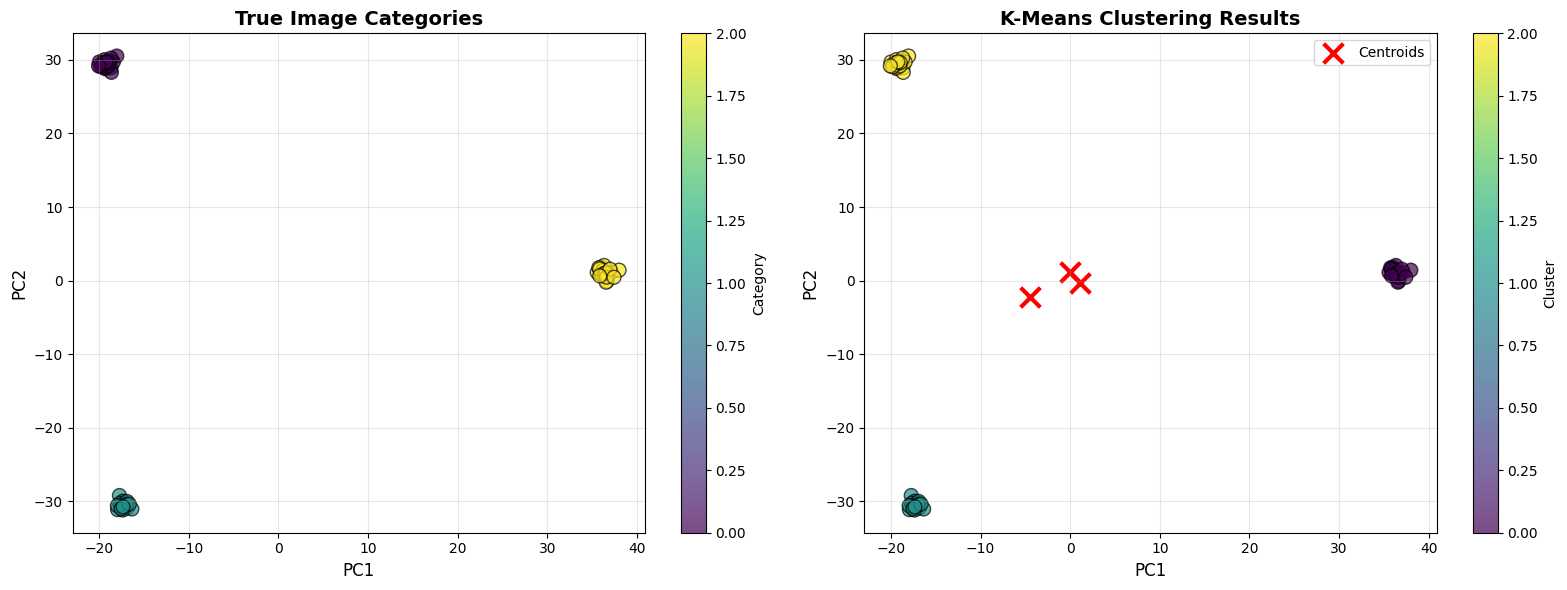

In [5]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(image_embeddings)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# True labels
scatter1 = axes[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                          c=true_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='k')
axes[0].set_title('True Image Categories', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Category')

# Predicted clusters
scatter2 = axes[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                          c=cluster_labels, cmap='viridis', s=100, alpha=0.7, edgecolors='k')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1].set_title('K-Means Clustering Results', fontsize=14, fontweight='bold')
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()
